## Project 3 - MTH 522 - Devcharan KN

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')
df.head()

C:\Users\devch\AppData\Local\Temp\ipykernel_26596\400017089.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier
0,I152049588,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155.0,0,2015-06-15 00:01:00,2015,6,Monday,0,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)",Tier 3
1,I152049593,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
2,I152049594,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
3,I152049463,1402,VANDALISM,E18,493.0,0,2015-06-15 00:03:00,2015,6,Monday,0,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Tier 4
4,I152049469,802,ASSAULT SIMPLE - BATTERY,D14,809.0,0,2015-06-15 00:45:00,2015,6,Monday,0,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",Tier 2


In [4]:
df['Tier'].value_counts()

Tier
Tier 3        89300
Tier 4        68045
Tier 2        47718
Tier Drugs    11081
Tier 1          394
Name: count, dtype: int64

In [5]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601', utc=True)
df['Timestamp'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601')

cutoff_date = pd.to_datetime('2023-10-31', utc=True)
cutoff_date2 = pd.to_datetime('2015-07-01', utc=True)

df = df[df['Timestamp']>= cutoff_date2].copy()
df = df[df['Timestamp']<= cutoff_date].copy()

In [6]:
accident_codes = [3801, 3802,3803,3810,3807,3805]

df_acc = df[df['OFFENSE_CODE'].isin(accident_codes)].copy()
df_acc.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
1540,I152054252,3803,M/V ACCIDENT - PERSONAL INJURY,D14,783.0,0,2015-07-01 08:45:00+00:00,2015,7,Wednesday,8,NEVINS ST,42.350063,-71.146415,"(42.35006303, -71.14641549)",Tier 4,2015-07-01 08:45:00+00:00
1542,I152054264,3803,M/V ACCIDENT - PERSONAL INJURY,B2,268.0,0,2015-07-01 09:24:00+00:00,2015,7,Wednesday,9,HAMPDEN ST,42.329081,-71.075013,"(42.32908071, -71.07501301)",Tier 4,2015-07-01 09:24:00+00:00
1550,I152054293,3802,M/V ACCIDENT - PROPERTY DAMAGE,E18,501.0,0,2015-07-01 11:30:00+00:00,2015,7,Wednesday,11,HYDE PARK AVE,42.280635,-71.118896,"(42.28063521, -71.11889610)",Tier 4,2015-07-01 11:30:00+00:00
1594,I152054434,3803,M/V ACCIDENT - PERSONAL INJURY,C6,192.0,0,2015-07-01 19:30:00+00:00,2015,7,Wednesday,19,MOHAWK ST,42.329303,-71.055727,"(42.32930278, -71.05572699)",Tier 4,2015-07-01 19:30:00+00:00
1608,I152054480,3801,M/V ACCIDENT - OTHER,B3,418.0,0,2015-07-01 22:18:00+00:00,2015,7,Wednesday,22,SELDEN ST,42.280894,-71.080375,"(42.28089366, -71.08037468)",Tier 4,2015-07-01 22:18:00+00:00


In [7]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36217 entries, 1540 to 216532
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   INCIDENT_NUMBER      36217 non-null  object             
 1   OFFENSE_CODE         36217 non-null  int64              
 2   OFFENSE_DESCRIPTION  36217 non-null  object             
 3   DISTRICT             36217 non-null  object             
 4   REPORTING_AREA       26258 non-null  float64            
 5   SHOOTING             36217 non-null  object             
 6   OCCURRED_ON_DATE     36217 non-null  datetime64[ns, UTC]
 7   YEAR                 36217 non-null  int64              
 8   MONTH                36217 non-null  int64              
 9   DAY_OF_WEEK          36217 non-null  object             
 10  HOUR                 36217 non-null  int64              
 11  STREET               36217 non-null  object             
 12  Lat                

In [8]:
df_acc['YEAR'].value_counts()

YEAR
2022    4884
2021    4645
2019    4482
2017    4246
2018    4079
2020    3952
2023    3951
2016    3938
2015    2040
Name: count, dtype: int64

In [9]:
df_acc['OFFENSE_DESCRIPTION'].value_counts()

OFFENSE_DESCRIPTION
M/V ACCIDENT - PERSONAL INJURY                8566
M/V ACCIDENT - OTHER                          8266
M/V ACCIDENT - PROPERTY DAMAGE                7376
M/V ACCIDENT - PROPERTY  DAMAGE               7112
M/V ACCIDENT - POLICE VEHICLE                 1683
M/V ACCIDENT - OTHER CITY VEHICLE             1604
M/V ACCIDENT - INVOLVING  BICYCLE - INJURY     863
M/V ACCIDENT - INVOLVING BICYCLE - INJURY      747
Name: count, dtype: int64

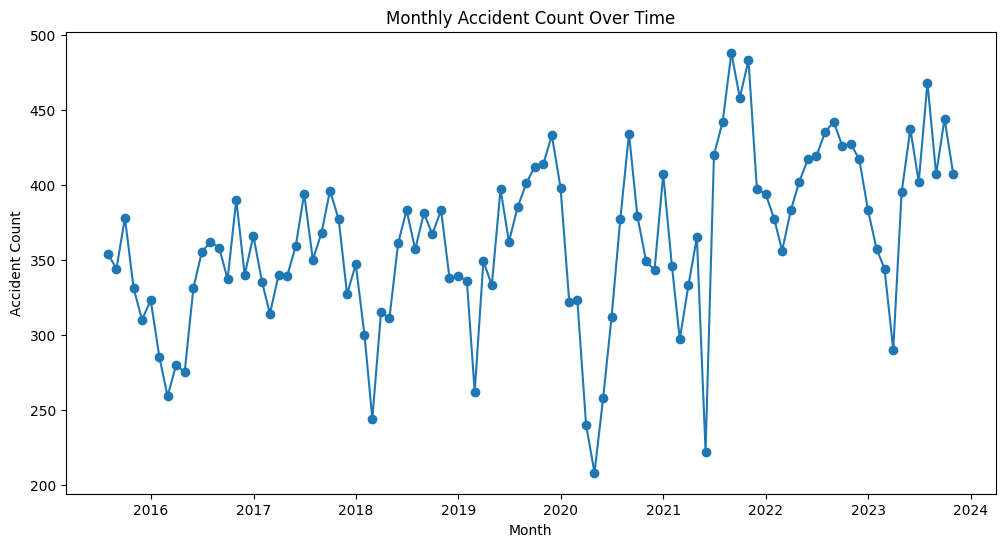

In [10]:
# Assuming your DataFrame is named 'crime_df'
df_acc['Timestamp'] = pd.to_datetime(df_acc['Timestamp'], utc = True)
monthly_accident_count = df_acc.resample('M', on='Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_accident_count, marker='o')
plt.title('Monthly Accident Count Over Time')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

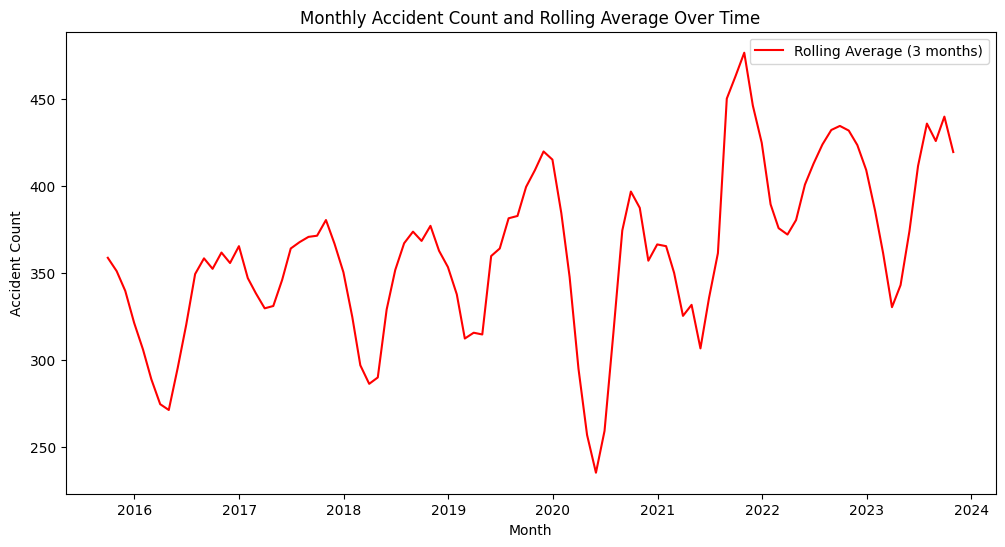

In [11]:
#Rolling average over a 3 month period

rolling_avg = monthly_accident_count.rolling(window=3).mean()

# Plot the monthly accident count and the rolling average
plt.figure(figsize=(12, 6))
#plt.plot(monthly_accident_count, marker='o', label='Monthly Count')
plt.plot(rolling_avg, color='red', label='Rolling Average (3 months)')
plt.title('Monthly Accident Count and Rolling Average Over Time')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.legend()
plt.show()

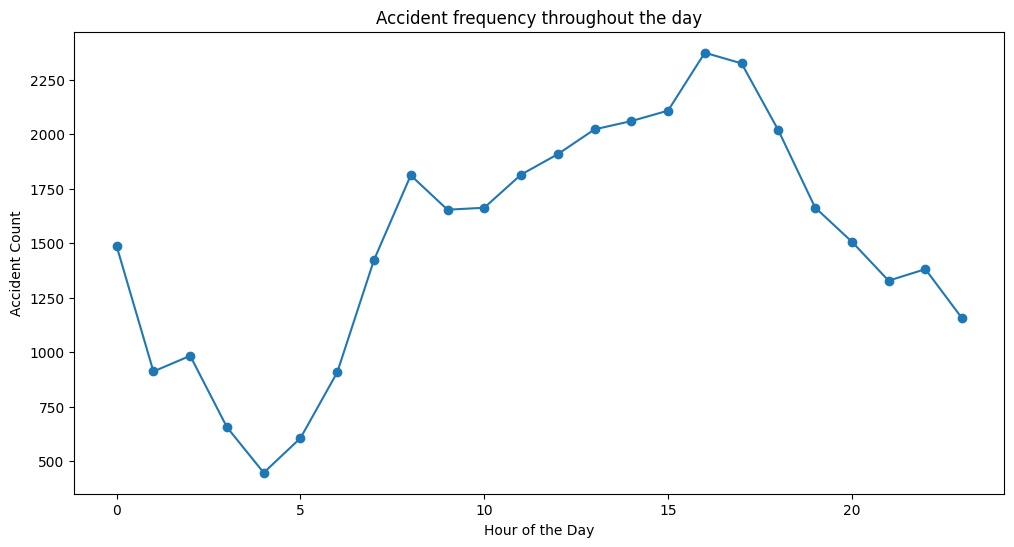

In [12]:
hourly_accident_count = df_acc.groupby('HOUR').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_accident_count, marker='o')
plt.title('Accident frequency throughout the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.show()

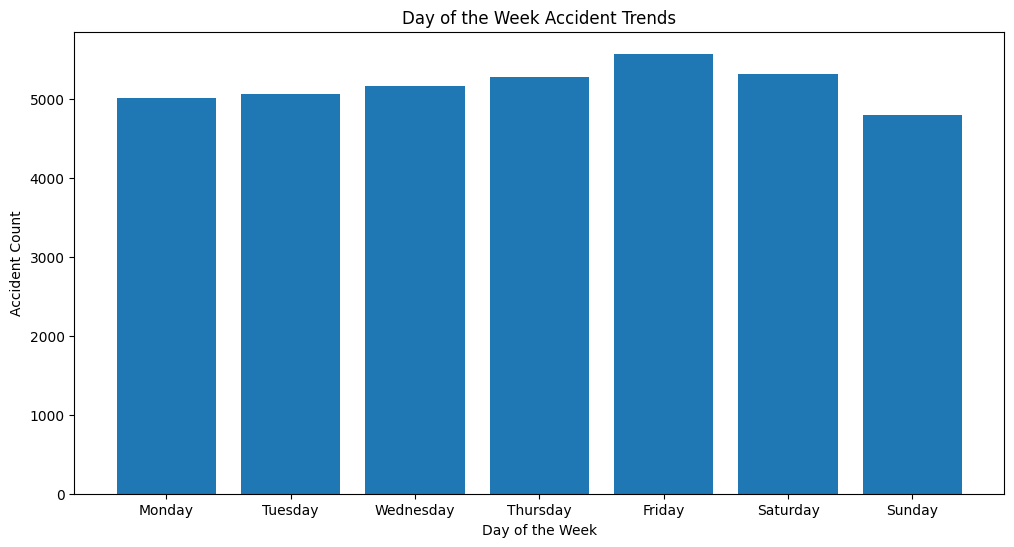

In [13]:
day_of_week_accident_count = df_acc.groupby('DAY_OF_WEEK').size()

# Reorder days of the week for better visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_accident_count = day_of_week_accident_count.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(day_of_week_accident_count.index, day_of_week_accident_count)
plt.title('Day of the Week Accident Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.show()

## ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
monthly_accident_count

Timestamp
2015-07-31 00:00:00+00:00    354
2015-08-31 00:00:00+00:00    344
2015-09-30 00:00:00+00:00    378
2015-10-31 00:00:00+00:00    331
2015-11-30 00:00:00+00:00    310
                            ... 
2023-06-30 00:00:00+00:00    402
2023-07-31 00:00:00+00:00    468
2023-08-31 00:00:00+00:00    407
2023-09-30 00:00:00+00:00    444
2023-10-31 00:00:00+00:00    407
Freq: M, Length: 100, dtype: int64

In [16]:
train_size = int(len(monthly_accident_count) * 0.8)
train, test = monthly_accident_count[:train_size], monthly_accident_count[train_size:]

In [17]:
order = (1, 1, 1)  # Example order, you may need to adjust
model = ARIMA(train, order=order)
fitted_model = model.fit()

In [18]:
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [19]:
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3582.4188033077094


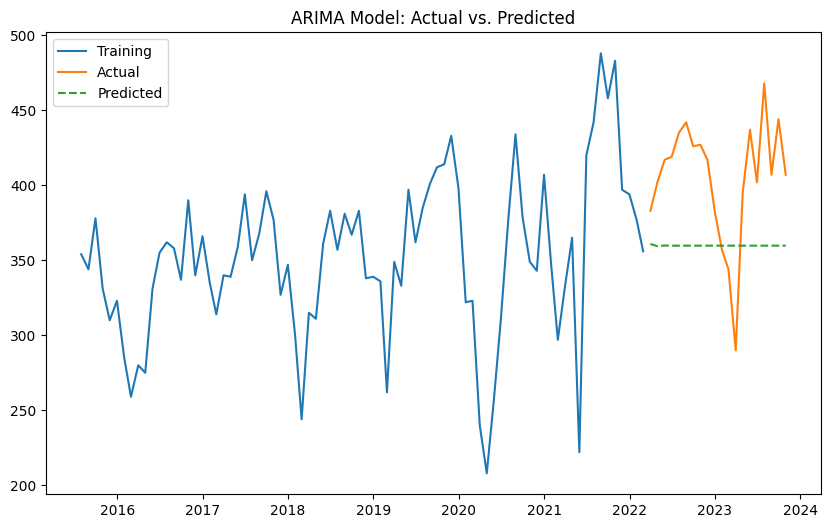

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs. Predicted')
plt.show()

---

## Exponential Smoothing State Space Model

In [21]:
# Exponential smoothing state space model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()
predictions_ets = fitted_ets_model.predict(start=len(train), end=len(train) + len(test) - 1)

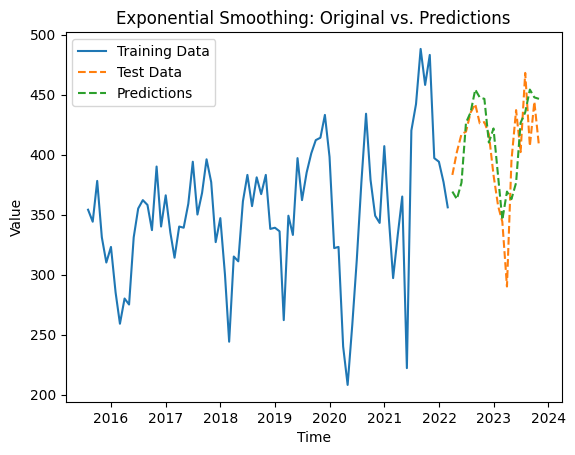

In [22]:
# Plotting the original time series
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', linestyle='--')

# Plotting the predictions
plt.plot(predictions_ets, label='Predictions', linestyle='--')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, predictions_ets)
rmse = np.sqrt(mse)

print(f"Mean Squared error: {mse}")
print(f"Root mean squared error: {rmse}")

Mean Squared error: 1148.913519632637
Root mean squared error: 33.89562685115348


In [24]:
df2 = pd.DataFrame(data=df_acc)

In [25]:
df2['Timestamp'] = pd.to_datetime(df2['OCCURRED_ON_DATE'],format = 'ISO8601')

In [26]:
df2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
1540,I152054252,3803,M/V ACCIDENT - PERSONAL INJURY,D14,783.0,0,2015-07-01 08:45:00+00:00,2015,7,Wednesday,8,NEVINS ST,42.350063,-71.146415,"(42.35006303, -71.14641549)",Tier 4,2015-07-01 08:45:00+00:00
1542,I152054264,3803,M/V ACCIDENT - PERSONAL INJURY,B2,268.0,0,2015-07-01 09:24:00+00:00,2015,7,Wednesday,9,HAMPDEN ST,42.329081,-71.075013,"(42.32908071, -71.07501301)",Tier 4,2015-07-01 09:24:00+00:00
1550,I152054293,3802,M/V ACCIDENT - PROPERTY DAMAGE,E18,501.0,0,2015-07-01 11:30:00+00:00,2015,7,Wednesday,11,HYDE PARK AVE,42.280635,-71.118896,"(42.28063521, -71.11889610)",Tier 4,2015-07-01 11:30:00+00:00
1594,I152054434,3803,M/V ACCIDENT - PERSONAL INJURY,C6,192.0,0,2015-07-01 19:30:00+00:00,2015,7,Wednesday,19,MOHAWK ST,42.329303,-71.055727,"(42.32930278, -71.05572699)",Tier 4,2015-07-01 19:30:00+00:00
1608,I152054480,3801,M/V ACCIDENT - OTHER,B3,418.0,0,2015-07-01 22:18:00+00:00,2015,7,Wednesday,22,SELDEN ST,42.280894,-71.080375,"(42.28089366, -71.08037468)",Tier 4,2015-07-01 22:18:00+00:00


In [27]:

weekly_accident_count = df2.resample('W-Mon').size()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [28]:
# Split the data into training and test sets
train_size = int(len(weekly_accident_count) * 0.8)
train_expsmoo_w, test_expsmoo_w = weekly_accident_count[:train_size], weekly_accident_count[train_size:]

NameError: name 'weekly_accident_count' is not defined

In [ ]:
# Instantiate and fit the ExponentialSmoothing model
model_expsmoo = ExponentialSmoothing(train_expsmoo_w, trend='add', seasonal='add', seasonal_periods=52)
result = model_expsmoo.fit()

In [ ]:
predictions_expsmoo = result.predict(start=test_expsmoo_w.index[0], end=test_expsmoo_w.index[-1])

In [ ]:
combined_series = pd.concat([test_expsmoo_w, predictions_expsmoo], axis=1)
combined_series.columns = ['Actual', 'Predicted']

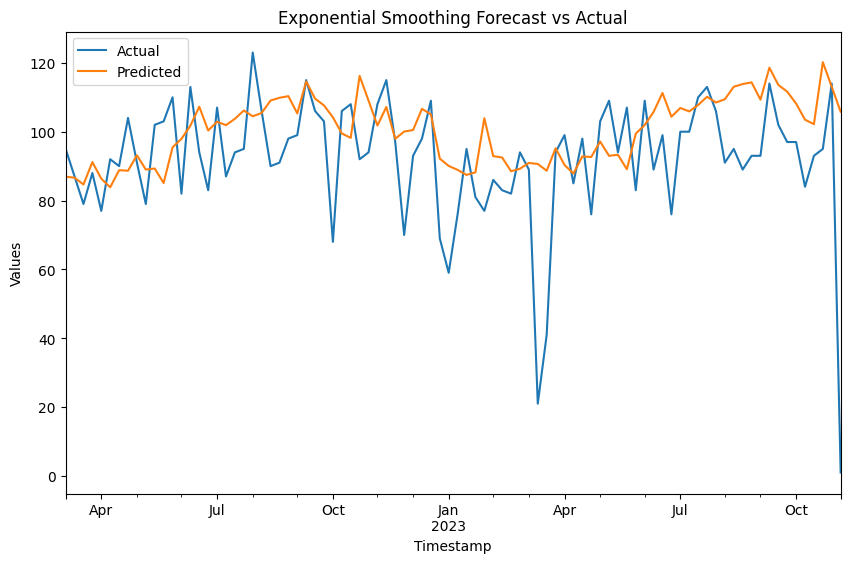

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
combined_series.plot(ax=plt.gca())
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

#### Predicting the future

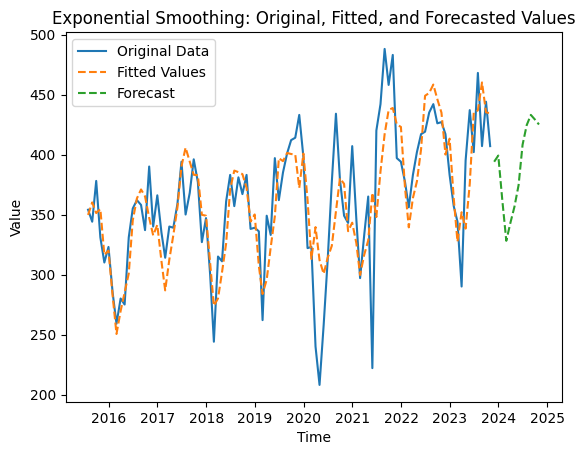

In [29]:
# Set the training size
train_size = int(len(monthly_accident_count) )
train = monthly_accident_count[:train_size]

# Exponential smoothing state space model
ets_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()

# Forecast into the future
forecast_steps = 12  # Set the number of steps to forecast into the future
forecast = fitted_ets_model.forecast(steps=forecast_steps)

# Plotting the original time series
plt.plot(monthly_accident_count, label='Original Data')

# Plotting the fitted values
plt.plot(fitted_ets_model.fittedvalues, label='Fitted Values', linestyle='--')

# Plotting the forecasted values
plt.plot(
    pd.date_range(start=monthly_accident_count.index[-1], periods=forecast_steps + 1, freq='M')[1:],
    forecast,
    label='Forecast',
    linestyle='--'
)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Original, Fitted, and Forecasted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


---

## Seasonal Decomposition

In [ ]:
#Seasonal decomposition of time series data
from statsmodels.tsa.seasonal import STL

stl_model = STL(train, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid


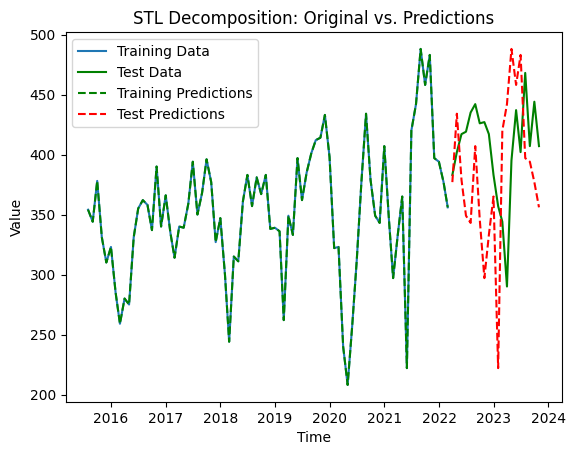

In [ ]:
# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting using the seasonal, trend, and residual components for the test set
test_pred = seasonal[-len(test):] + trend[-len(test):] + resid[-len(test):]

# Plotting the original time series
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', linestyle='-', color='green')

# Plotting the predictions
plt.plot(train_pred, label='Training Predictions', linestyle='--', color='green')
plt.plot(test.index, test_pred, label='Test Predictions', linestyle='--', color = 'red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

#### Forecast into the future

In [ ]:

# Set the training size
train_size = int(len(monthly_accident_count) * 0.8)
train = monthly_accident_count[:train_size]
test = monthly_accident_count[train_size:]

# Seasonal decomposition of time series data
stl_model = STL(train, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid

# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting using the seasonal, trend, and residual components for the future
forecast_steps = 12  # Set the number of steps to forecast into the future

# Predicting the future seasonal component
forecast_seasonal = stl_result.forecast(steps=forecast_steps).seasonal

# Predicting the future trend component
forecast_trend = stl_result.forecast(steps=forecast_steps).trend

# Predicting the future residual component
forecast_resid = stl_result.forecast(steps=forecast_steps).resid

# Combine the components for forecasting into the future
forecast_pred = forecast_seasonal + forecast_trend + forecast_resid

# Plotting the original time series
plt.plot(monthly_accident_count, label='Original Data')

# Plotting the fitted values
plt.plot(train.index, train_pred, label='Training Predictions', linestyle='--', color='green')

# Plotting the forecasted values
plt.plot(pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='M')[1:],
         forecast_pred,
         label='Forecast',
         linestyle='--',
         color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Original, Training Predictions, and Forecasted Values')

# Displaying the legend
plt.legend()
# Show the plot
plt.show()

AttributeError: 'DecomposeResult' object has no attribute 'forecast'

C:\Users\devch\AppData\Local\Temp\ipykernel_4088\1554668063.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_seasonal = stl_result.seasonal[-1] + np.arange(1, forecast_steps + 1)
C:\Users\devch\AppData\Local\Temp\ipykernel_4088\1554668063.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_trend = stl_result.trend[-1] + np.arange(1, forecast_steps + 1)
C:\Users\devch\AppData\Local\Temp\ipykernel_4088\1554668063.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

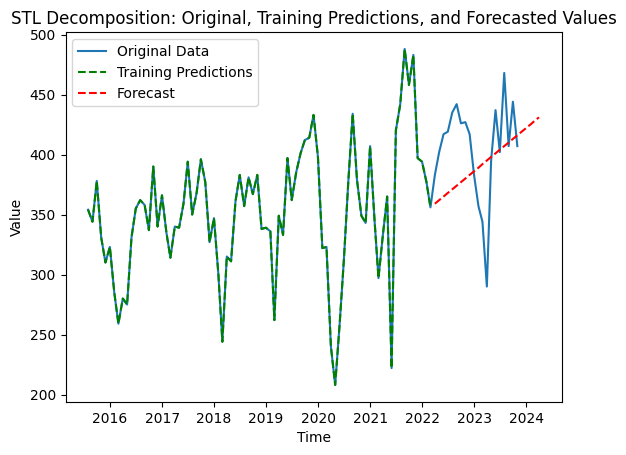

In [ ]:

# Set the training size
train_size = int(len(monthly_accident_count) * 0.8)
train = monthly_accident_count[:train_size]
test = monthly_accident_count[train_size:]

# Seasonal decomposition of time series data
stl_model = STL(train, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid

# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting into the future
forecast_steps = 25  # Set the number of steps to forecast into the future

# Manually predict the future seasonal component
forecast_seasonal = stl_result.seasonal[-1] + np.arange(1, forecast_steps + 1)

# Manually predict the future trend component
forecast_trend = stl_result.trend[-1] + np.arange(1, forecast_steps + 1)

# Manually predict the future residual component
forecast_resid = stl_result.resid[-1] + np.arange(1, forecast_steps + 1)

# Combine the components for forecasting into the future
forecast_pred = forecast_seasonal + forecast_trend + forecast_resid

# Plotting the original time series
plt.plot(monthly_accident_count, label='Original Data')

# Plotting the fitted values
plt.plot(train.index, train_pred, label='Training Predictions', linestyle='--', color='green')

# Plotting the forecasted values
plt.plot(pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='M')[1:],
         forecast_pred,
         label='Forecast',
         linestyle='--',
         color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Original, Training Predictions, and Forecasted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


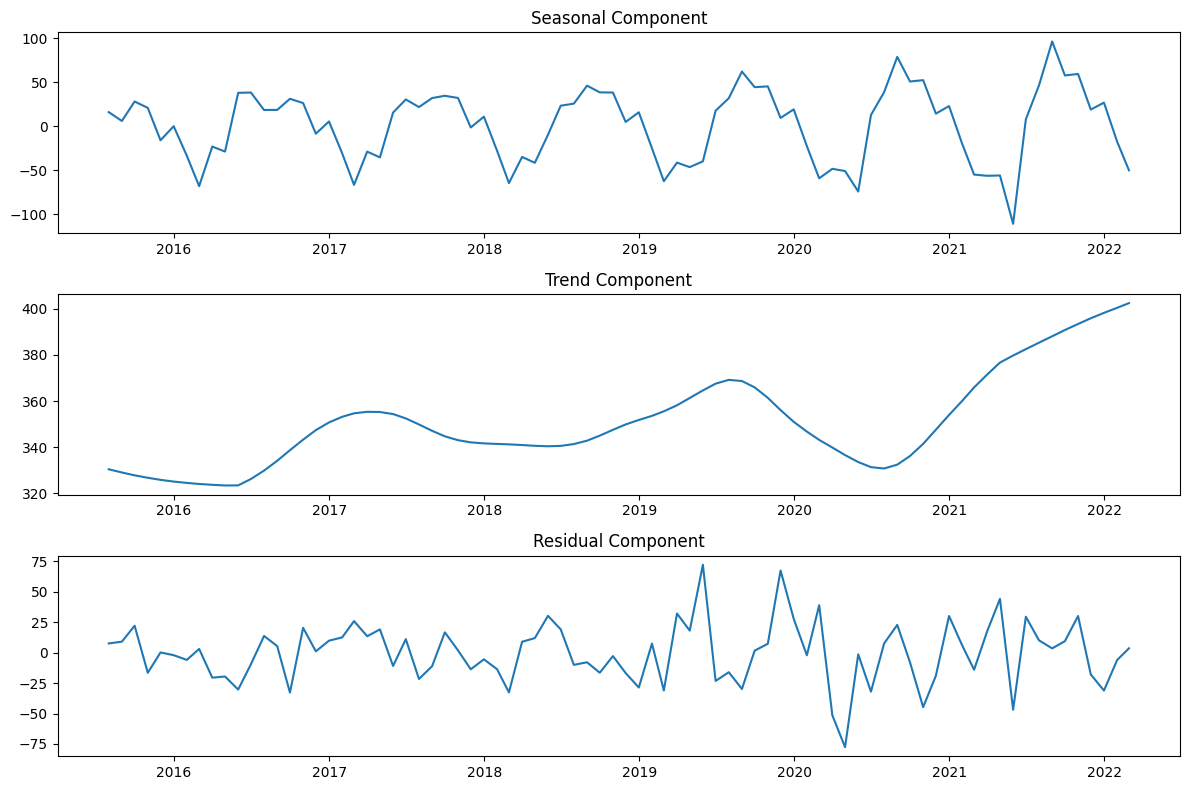

In [ ]:
# Seasonal decomposition of time series data
stl_model = STL(train, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid

# Plotting the components separately
plt.figure(figsize=(12, 8))

# Plotting the seasonal component
plt.subplot(3, 1, 1)
plt.plot(seasonal)
plt.title('Seasonal Component')

# Plotting the trend component
plt.subplot(3, 1, 2)
plt.plot(trend)
plt.title('Trend Component')

# Plotting the residual component
plt.subplot(3, 1, 3)
plt.plot(resid)
plt.title('Residual Component')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

---

## SARIMAX

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


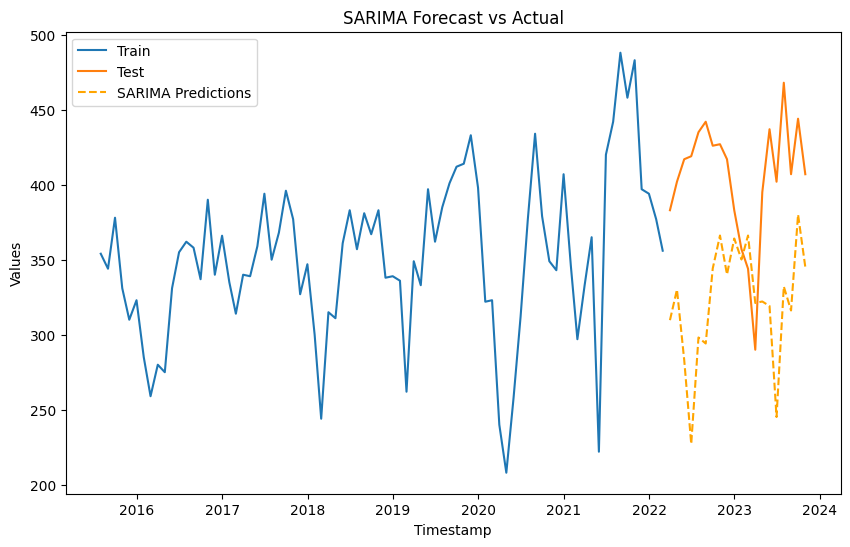

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the time series into training and test sets
train_size = int(len(monthly_accident_count) *0.8)
train, test = monthly_accident_count[:train_size], monthly_accident_count[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # Replace with your chosen order (p, d, q)
seasonal_order = (1, 1, 1, 52)  # Replace with your chosen seasonal order (P, D, Q, m)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

# Make predictions on the test set
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_mean, label='SARIMA Predictions', linestyle='--', color='orange')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()